# Prozorske funkcije

[<span style="font-size:1.2em;"><b>Digitalna obrada signala</b></span>](http://tnt.etf.rs/~oe3dos)<span style="font-size:1.2em;">, Vladimir Petrović</span>

Ovaj _notebook_ će predstaviti neke često korišćene prozorske funkcije. Demonstriraće njihove osobine i analiziraće primenu različitih prozorskih funkcija u frekvencijskoj analizi signala.

In [3]:
USE_WIDGETS = True

def importEssentialLibs(USE_WIDGETS):
    import numpy as np
    if USE_WIDGETS:
        %matplotlib widget
    else:
        %matplotlib inline
    import matplotlib as mpl
    mpl.rc('text', usetex = True)
    mpl.rc('font', family = 'serif', size = 18)
    import matplotlib.pyplot as plt
    
    return np, mpl, plt

## Razdvajanje dve frekvencijske komponente u spektru
Ranije smo videli da frekvencijska rezolucija diskretne Furijeove transformacije zavisi od broja tačaka u kojima smo odabirali signal. Time se tačno određuje sa kojim korakom možemo detektovati frekvencijske komponente u spektru signala. Dodatno smo videli da dopunjavanje nulama u opštem slučaju, a i najčešće, ne može doprineti boljoj frekvencijskoj rezoluciji. 

Dodatno, videli smo da u većini slučajeva spektar curi, tj. javljaju se nenulti koeficijenti DFT-a na učestanostima daleko od učestanosti signala koji analiziramo. Ovo je posledica diskontinuiteta u periodičnom produženju signala. 

Kako bismo dalje uočili probleme koji mogu nastati pri frekvencijskoj analizi signala DFT-om nacrtaćemo DFT i DTFT signala koji je zbir dve kompleksne sinusoide i analiziraćemo kada te dve kompleksne sinusoide možemo razlikovati u spektru. Evo prvog primera: 

interactive(children=(FloatSlider(value=8.0, description='k2', max=16.0, step=0.5), Output()), _dom_classes=('…

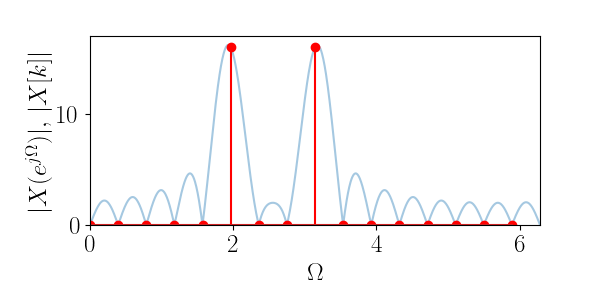

In [4]:
np, mpl, plt = importEssentialLibs(USE_WIDGETS)
import ipywidgets as widgets

def fourierTransform(x, N):
    # Ova funkcija izračunava Furijeovu transformaciju u N ekvidistantnih tačaka
    if len(x) < N:
        x = np.append(x, np.zeros(N - len(x)))

    X = np.zeros(N, dtype = 'complex')
    n = np.arange(N)
    for k in range(N):
        Omega_k = 2*np.pi/N*k
        X[k] = np.sum(x*np.exp(-1j*Omega_k*n))
    
    return X

N = 16

fig = plt.figure(figsize = [6, 3])

def plotFTandDFT(k2):
    
    n = np.arange(N)
    # relativne ucestanosti
    F1 = 5/N  
    F2 = k2/N 

    x = np.exp(2j*np.pi*F1*n) + np.exp(2j*np.pi*F2*n)

    NFT = 1024;
    X = fourierTransform(x, NFT)
    Omega = np.arange(NFT)/NFT*2*np.pi

    Xk = X[::NFT//N]
    Omega_k = Omega[::NFT//N]

    plt.clf()
    plt.plot(Omega, abs(X), alpha = 0.4)
    plt.stem(Omega_k, abs(Xk), 'r', markerfmt='ro')

    plt.subplots_adjust(bottom=0.25, left=0.15)
    plt.xlabel(r'$\Omega$')
    plt.ylabel(r'$|X(e^{j\Omega})|, \, |X[k]|$')
    plt.xlim([0, 2*np.pi])
    plt.ylim([0, max(abs(X))*1.05]);
    
widgets.interact(plotFTandDFT, k2 = (0, N, 0.5));

Primećujemo da se signali mogu razlikovati u spektru ako je razmak između njihovih relativnih učestanosti $\Delta F = 1/N$, tj. ako je veći od rezolucije DFT-a. Međutim, šta ako su im amplitude različite? 

interactive(children=(FloatSlider(value=8.0, description='k2', max=16.0, step=0.5), FloatSlider(value=0.0, des…

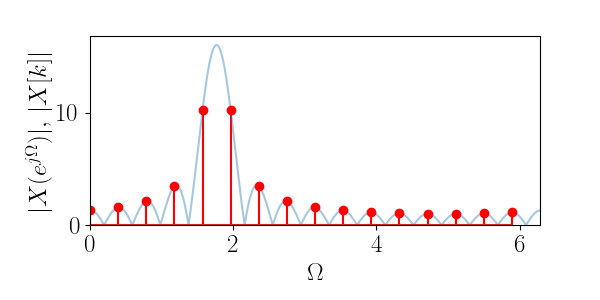

In [4]:
N = 16
fig = plt.figure(figsize = [6, 3])
    
def plotFTandDFT(k2, A2):
    plt.clf()
    
    n = np.arange(N)
    # relativne ucestanosti
    F1 = 4.5/N  
    F2 = k2/N 

    x = np.exp(2j*np.pi*F1*n) + A2*np.exp(2j*np.pi*F2*n)

    NFT = 1024;
    X = fourierTransform(x, NFT)
    Omega = np.arange(NFT)/NFT*2*np.pi

    Xk = X[::NFT//N]
    Omega_k = Omega[::NFT//N]

    plt.plot(Omega, abs(X), alpha = 0.4)
    plt.stem(Omega_k, abs(Xk), 'r', markerfmt='ro')

    plt.subplots_adjust(bottom=0.25, left=0.15)
    plt.xlabel(r'$\Omega$')
    plt.ylabel(r'$|X(e^{j\Omega})|, \, |X[k]|$')
    plt.xlim([0, 2*np.pi])
    plt.ylim([0, max(abs(X))*1.05]);
    
widgets.interact(plotFTandDFT, k2 = (0, N, 0.5), A2 = (0, 1, 0.1));

Primetimo da signal male amplitude ne možemo uopšte ni vidieti u spektru za mnoge učestanosti. Ovo je posledica curenja spektra signala velike amplitude. Praktično, koeficijenti DFT-a i DTFT-a komponente koja ima veliku amplitudu su toliko veliki na svim učestanostima da su zamaskirali sve druge frekvencijske komponente male amplitude. Dodatno, primetimo da je ovaj efekat više izražen kada spektar više curi:

interactive(children=(FloatSlider(value=4.5, description='k1', max=5.0, min=4.0), FloatSlider(value=8.0, descr…

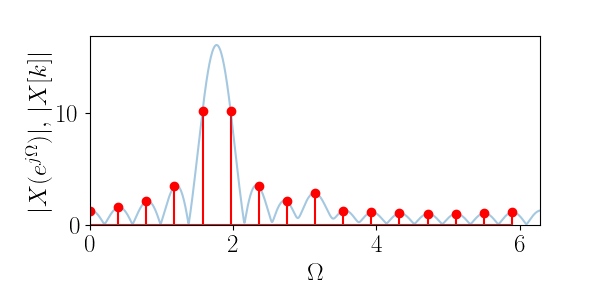

In [5]:
N = 16
fig = plt.figure(figsize = [6, 3])

def plotFTandDFT(k1, k2):
    plt.clf()
    
    n = np.arange(N)
    # relativne ucestanosti
    F1 = k1/N  
    F2 = k2/N 

    x = np.exp(2j*np.pi*F1*n) + 0.1*np.exp(2j*np.pi*F2*n)

    NFT = 1024;
    X = fourierTransform(x, NFT)
    Omega = np.arange(NFT)/NFT*2*np.pi

    Xk = X[::NFT//N]
    Omega_k = Omega[::NFT//N]

    
    plt.plot(Omega, abs(X), alpha = 0.4)
    plt.stem(Omega_k, abs(Xk), 'r', markerfmt='ro')

    plt.subplots_adjust(bottom=0.25, left=0.15)
    plt.xlabel(r'$\Omega$')
    plt.ylabel(r'$|X(e^{j\Omega})|, \, |X[k]|$')
    plt.xlim([0, 2*np.pi])
    plt.ylim([0, max(abs(X))*1.05]);
    
widgets.interact(plotFTandDFT, k1 = (N/4, N/4+1, 0.1), k2 = (0, N, 0.5));

## Primena prozorske funkcije na signal

Ranije smo videli da je curenje spektra posledica diskontinuiteta u periodičnom produženju signala i to ovde ponovo naglašavamo. Što su ti diskontinutieti veći, to je curenje spektra izraženije, tj. postoje veće frekvencijske komponente na svim učestanostima $\Omega_k$. Te komponente smetaju pri detekciji signala male amplitude. Ako bi se one nekako mogle smanjiti, postoji mogućnost da bi se sporedne komponente ponovo mogle detektovati. Dakle, treba smanjiti diskontinuitete u periodičnom produženju signala. Ovo je jednostavno uraditi množenjem signala drugim signalom kod koga vrednosti opadaju od sredine ka krajevima. Ovaj signal može biti različitog oblika: trougaonog, sinusoidalnog i slično. Primer množenja trougaonim prozorom je prikazan u sledećem programu:

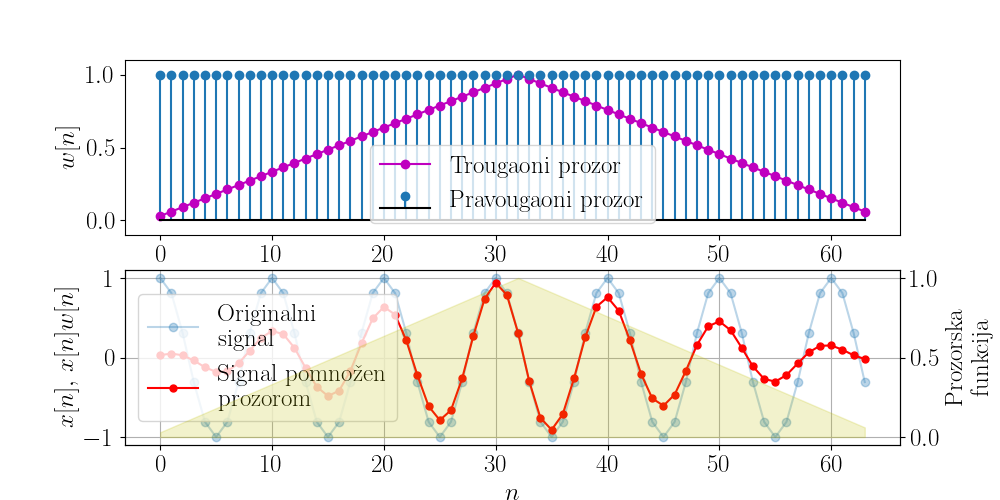

In [6]:
np, mpl, plt = importEssentialLibs(USE_WIDGETS)
import scipy.signal as signal

N = 64;
n = np.arange(N)

fig,axs = plt.subplots(2, 1, figsize=[10,5])

Nf = 128
triwin = signal.triang(N, sym = False)
rectwin = np.ones(N)

ax = axs[0]
ax.plot(n, triwin,'m-o', label='Trougaoni prozor')
ax.stem(n, rectwin, basefmt='k-', label='Pravougaoni prozor')
ax.set_ylabel('$w[n]$')
ax.set_ylim([-0.1, 1.1])
ax.legend(loc = 0)

x = np.cos(2*np.pi*0.1*n) 
window = signal.triang(N)

ax = axs[1]
ax.plot(n, x, '-o', label= 'Originalni \nsignal', alpha=0.3)
ax.plot(n,triwin*x,'-or', label= 'Signal pomnožen\nprozorom',ms=5.)
ax.set_ylabel('$x[n],\, x[n]w[n]$')
ax.set_xlabel('$n$')
ax.legend(loc = 0)
ax.grid()

ax2 = ax.twinx()
ax2.fill_between(n, triwin, alpha=0.2, color='y')
ax2.set_ylabel('Prozorska\nfunkcija');

Kao što smo videli, odbirke trougaone prozorske funkcije možemo lako dobiti iz paketa _scipy.signal_ na sledeći način:

```python
import scipy.signal as signal
w = signal.triang(N, sym = False)
```


Parametar ```sym``` se pri frekvencijskoj analizi signala postavlja na ```False```. Ako se funkcija koristi za projektovanje filtara o čemu će biti reči pri kraju kursa, onda se on postavlja na ```True```. Isto važi i za druge prozorske funkcije. Jednačine date u knjizi daju isti rezultat kao prozorske funkcije iz _Scipy_ paketa kod kojih je ```sym = True```.

Sada da vidimo šta se dešava sa istim signalom od ranije ako na njega primenimo trougaonu prozorsku funkciju.

interactive(children=(FloatSlider(value=4.5, description='k1', max=5.0, min=4.0), FloatSlider(value=8.0, descr…

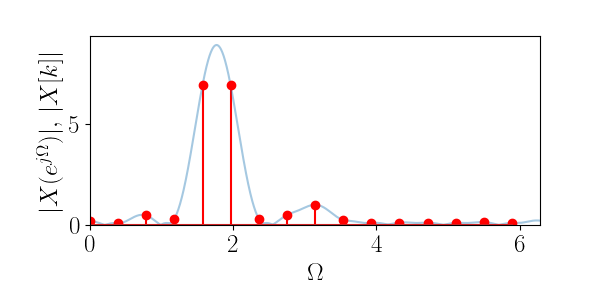

In [6]:
np, mpl, plt = importEssentialLibs(USE_WIDGETS)
import ipywidgets as widgets
import scipy.signal as signal

def fourierTransform(x, N):
    # Ova funkcija izračunava Furijeovu transformaciju u N ekvidistantnih tačaka
    if len(x) < N:
        x = np.append(x, np.zeros(N - len(x)))

    X = np.zeros(N, dtype = 'complex')
    n = np.arange(N)
    for k in range(N):
        Omega_k = 2*np.pi/N*k
        X[k] = np.sum(x*np.exp(-1j*Omega_k*n))
    
    return X

N = 16
fig = plt.figure(figsize = [6, 3])
    
def plotFTandDFT(k1, k2):
    plt.clf()
    
    n = np.arange(N)
    # relativne ucestanosti
    F1 = k1/N  
    F2 = k2/N 

    x = np.exp(2j*np.pi*F1*n) + 0.1*np.exp(2j*np.pi*F2*n)
    w = signal.triang(N, sym = False)
    
    NFT = 1024;
    X = fourierTransform(x*w, NFT)
    Omega = np.arange(NFT)/NFT*2*np.pi

    Xk = X[::NFT//N]
    Omega_k = Omega[::NFT//N]

    plt.plot(Omega, abs(X), alpha = 0.4)
    plt.stem(Omega_k, abs(Xk), 'r', markerfmt='ro')

    plt.subplots_adjust(bottom=0.25, left=0.15)
    plt.xlabel(r'$\Omega$')
    plt.ylabel(r'$|X(e^{j\Omega})|, \, |X[k]|$')
    plt.xlim([0, 2*np.pi])
    plt.ylim([0, max(abs(X))*1.05]);
    
widgets.interact(plotFTandDFT, k1 = (N/4, N/4+1, 0.1), k2 = (0, N, 0.5));

Lako primećujemo da je curenje spektralne komponente velike amplitude smanjeno i da sada gotovo uvek možemo primetiti manju frekvencijsku komponentu. Međutim, u spektru možemo primetiti da ove dve frekvencijske komponente, iako daju manje vrednosti koeficijenata daleko od njih, uzrokuju da koeficijenti u njihovoj neposrednoj blizini budu veći. Ovo je posledica toga što je množenje u vremenskom domenu konvolucija u frekvencijskom, pa u spektru praktično dobijamo konvoluciju spektra originalnog signala (dva jedinična impulsa) i spektra prozorske funkcije. Ranije je to bila pravougaona prozorska funkcija, sada je to trougaona. Spektar trougaone prozorske funkcije je širi oko nule i zbog toga dobijamo ovo "širenje" pojedinačnih komponenti u rezultujućem spektru. Nacrtajmo spektar trougaone prozorske funkcije i nekih drugih prozorskih funkcija:

interactive(children=(Dropdown(description='windowname', options=('Pravougaona', 'Trougaona', 'Hanova', 'Hemin…

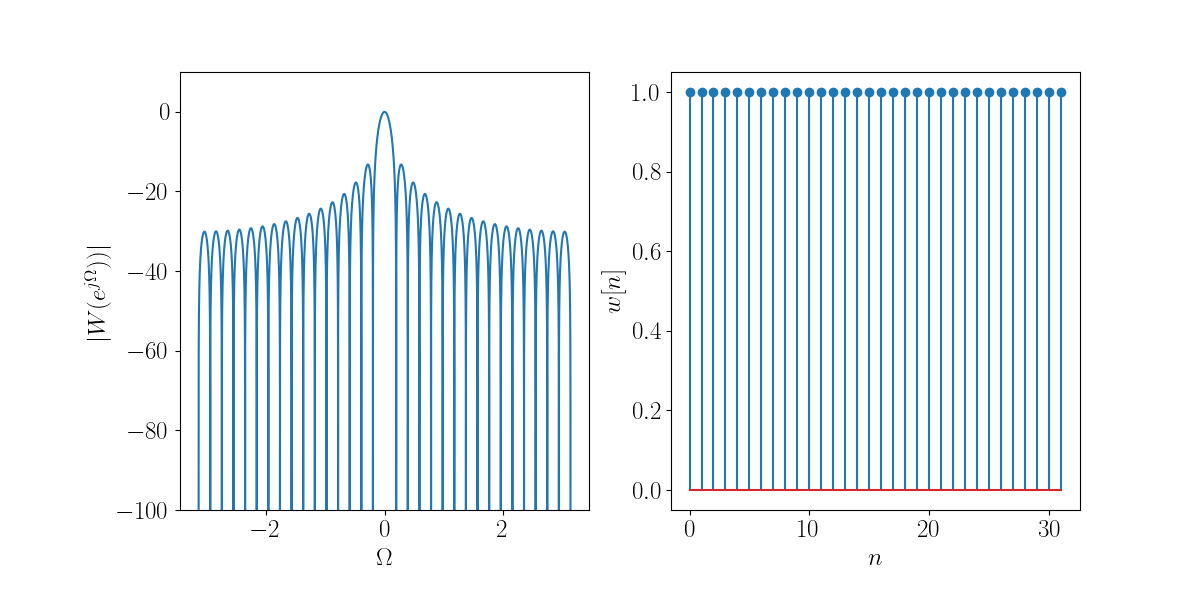

In [8]:
np, mpl, plt = importEssentialLibs(USE_WIDGETS)
import scipy.fft as fft

import IPython
from IPython.display import Markdown

import ipywidgets as widgets

def mainLobeWidth(w):
    Nfft = 8096
    Wa = np.abs(fft.fft(w, Nfft))
    minimumPositions = signal.argrelextrema(Wa, np.less)
    minimumPositions = np.array(minimumPositions[0])
    DeltaOmega = 2*minimumPositions[0]/Nfft*2*np.pi
    return DeltaOmega

def sideLobesAttenuation(w):
    Nfft = 8096*16
    Wa = np.abs(fft.fft(w, Nfft))
    minimumPositions = signal.argrelextrema(Wa, np.less)
    minimumPositions = np.array(minimumPositions[0])
    WaNew = Wa[minimumPositions[0]:Nfft//2] # samo do polovine jer je spektar simetrican
    att = 20*np.log10(max(Wa)/max(WaNew)) # in dB
    return att

fig, axs = plt.subplots(1, 2, figsize = [12, 6])
plt.subplots_adjust(bottom=0.15, left=0.15)
    
def loadSignalAndPlotSpectra(windowname, N):
    
    if windowname in "Pravougaona":
        w = signal.boxcar(N)
    if windowname in "Trougaona":
        w = signal.triang(N, sym=False)
    if windowname in "Hanova":
        w = signal.hann(N, sym=False)
    if windowname in "Hemingova":
        w = signal.hamming(N, sym=False)
    if windowname in "Blekmenova":
        w = signal.blackman(N, sym=False)
    if windowname in "Bartletova": #vrlo slična trougaonoj samo sa nulama na krajevima
        w = signal.bartlett(N, sym=False)
    
    Nfft = 8096*512;
    
    W = fft.fftshift(fft.fft(w, Nfft))
    WadB = 20*np.log10(np.abs(W))
    # normalize
    WadB -= max(WadB)
    Omega = np.arange(Nfft)/Nfft*2*np.pi - np.pi
    
    
    #Clear figures 
    axs[0].cla()    
    axs[1].cla() 
    
    # Plot spectra
       
    ax = axs[0]
    ax.plot(Omega, WadB)
    ax.set_xlabel(r'$\Omega$')
    ax.set_ylabel(r'$|W(e^{j\Omega}))|$');
    ax.set_ylim([-100, 10])
    
    # Plot signal
    n = np.arange(N)
    ax = axs[1]
    ax.stem(n, w)
    ax.set_xlabel(r'$n$')
    ax.set_ylabel(r'$w[n]$')
        
    # Main lobe width
    numWidthsInPi = 1/(mainLobeWidth(w)/(2*np.pi)) # koliko se lukova sadrži u 2pi
    display(Markdown(f"Širina glavnog luka: $2\pi/%.1f$" % (numWidthsInPi)))
    
    # Side lobes attenuation
    display(Markdown(f"Minimalno slabljenje bočnih lukova: $%.1f$ dB" % (sideLobesAttenuation(w))))
    
     

widgets.interact(loadSignalAndPlotSpectra, 
                 N = (8, 64, 8), 
                 windowname=["Pravougaona",
                             "Trougaona",  
                             "Hanova", 
                             "Hemingova", 
                             "Blekmenova",
                             "Bartletova"]);

Primenimo prozorske funkcije na neki primer signala.

interactive(children=(FloatSlider(value=0.25, description='A2', max=0.5, min=0.01, step=0.01), Dropdown(descri…

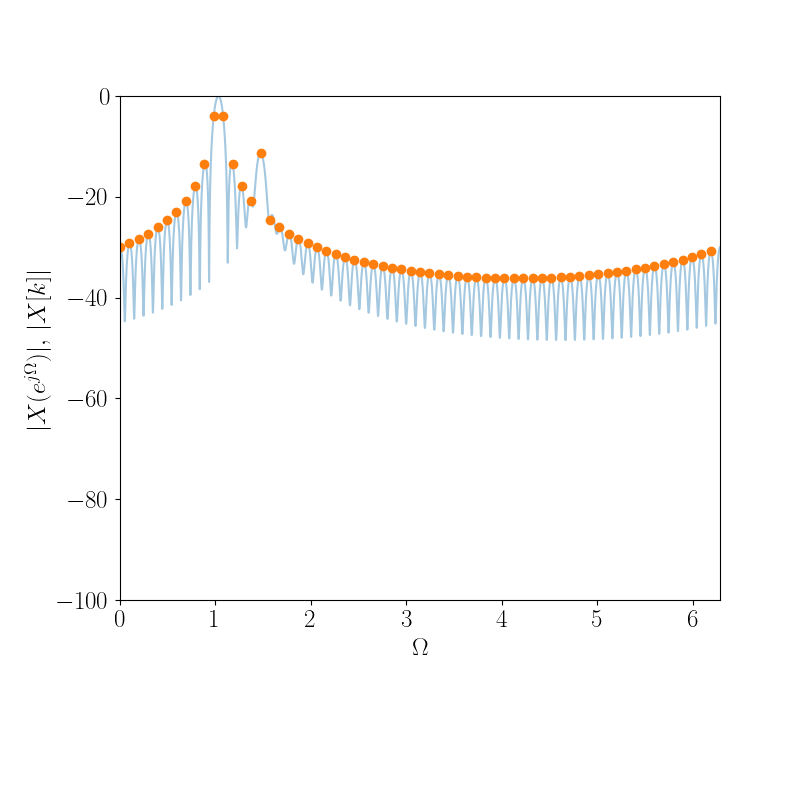

In [9]:
np, mpl, plt = importEssentialLibs(USE_WIDGETS)
import ipywidgets as widgets
import scipy.signal as signal

N = 64

fig = plt.figure(figsize = [8, 8])
    

def plotFTandDFT(A2, windowname):
    plt.clf()
    
    n = np.arange(N)
    # relativne ucestanosti
    F1 = 10.5/64  
    F2 = 15/64 

    x = np.exp(2j*np.pi*F1*n) + A2*np.exp(2j*np.pi*F2*n)
    
    if windowname in "Pravougaona":
        w = signal.boxcar(N)
    if windowname in "Trougaona":
        w = signal.triang(N, sym=False)
    if windowname in "Hanova":
        w = signal.hanning(N, sym=False)
    if windowname in "Hemingova":
        w = signal.hamming(N, sym=False)
    if windowname in "Blekmenova":
        w = signal.blackman(N, sym=False)
    if windowname in "Bartletova": #vrlo slična trougaonoj samo sa nulama na krajevima
        w = signal.bartlett(N, sym=False)
        
    NFT = 8096;
    X = fft.fft(x*w, NFT)
    Xan = abs(X)/max(abs(X)) # normalize
    Omega = np.arange(NFT)/NFT*2*np.pi

    Xk = fft.fft(x*w)
    Xkan = abs(Xk)/max(abs(X)) # normalize
    Omega_k = np.arange(N)/N*2*np.pi
    
    plt.plot(Omega, 20*np.log10(Xan), alpha = 0.4)
    plt.plot(Omega_k, 20*np.log10(Xkan), 'o')

    plt.subplots_adjust(bottom=0.25, left=0.15)
    plt.xlabel(r'$\Omega$')
    plt.ylabel(r'$|X(e^{j\Omega})|, \, |X[k]|$')
    plt.xlim([0, 2*np.pi])
    plt.ylim([-100, 0]);
    

widgets.interact(plotFTandDFT, 
                 A2 = (0.01, 0.5, 0.01), 
                 windowname=["Pravougaona",
                             "Trougaona",  
                             "Hanova", 
                             "Hemingova", 
                             "Blekmenova",
                             "Bartletova"]);

Važno je da primetimo da neke prozorske funkcije imaju toliko širok glavni luk da značajno pogoršavaju frekvencijsku rezoluciju pa se tada bliske frekvencijske komponente ne mogu razlikovati, iako je slabljenje bočnih lukova veliko.

## Kajzerova prozorska funkcija
Ostaje još da pomenemo Kajzerovu prozorsku funkciju koja je praktična jer ima parametar kojim se može podešavati slabljenje bočnih lukova. Naravno, ako se slabljenje bočnih lukova poveća, onda se i širina glavnog luka poveća, što kvari frekvencijsku rezoluciju. Kao i ranije, frekvencijsku rezoluciju ćemo poboljšati odabiranjem signala u većem broju tačaka.

interactive(children=(IntSlider(value=32, description='N', max=64, min=8, step=8), FloatSlider(value=5.0, desc…

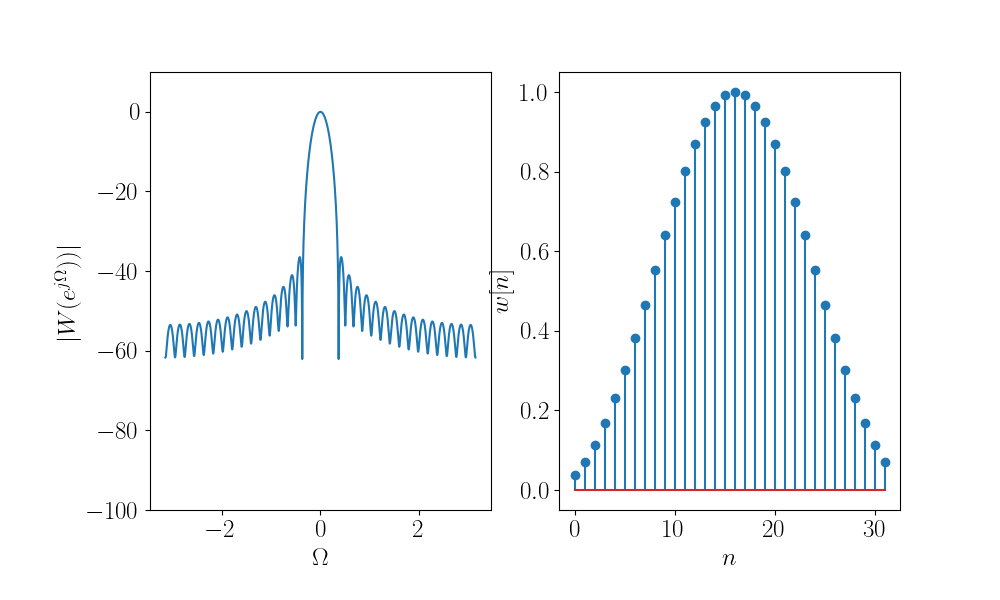

In [10]:
np, mpl, plt = importEssentialLibs(USE_WIDGETS)
import scipy.fft as fft

import IPython
from IPython.display import Markdown

import ipywidgets as widgets

def mainLobeWidth(w):
    Nfft = 8096
    Wa = np.abs(fft.fft(w, Nfft))
    minimumPositions = signal.argrelextrema(Wa, np.less)
    minimumPositions = np.array(minimumPositions[0])
    DeltaOmega = 2*minimumPositions[0]/Nfft*2*np.pi
    return DeltaOmega

def sideLobesAttenuation(w):
    Nfft = 8096*16
    Wa = np.abs(fft.fft(w, Nfft))
    minimumPositions = signal.argrelextrema(Wa, np.less)
    minimumPositions = np.array(minimumPositions[0])
    WaNew = Wa[minimumPositions[0]:Nfft//2] # samo do polovine jer je spektar simetrican
    att = 20*np.log10(max(Wa)/max(WaNew)) # in dB
    return att

fig, axs = plt.subplots(1, 2, figsize = [10, 6])
plt.subplots_adjust(bottom=0.15, left=0.15)
    
def loadSignalAndPlotSpectra(N, beta):
    
    w = signal.kaiser(N, beta, sym=False)
    
    Nfft = 8096*128;
    
    W = fft.fftshift(fft.fft(w, Nfft))
    WadB = 20*np.log10(np.abs(W))
    # normalize
    WadB -= max(WadB)
    Omega = np.arange(Nfft)/Nfft*2*np.pi - np.pi
    
    #Clear figures 
    axs[0].cla()    
    axs[1].cla()    
        
    # Plot spectra
    ax = axs[0]
    ax.plot(Omega, WadB)
    ax.set_xlabel(r'$\Omega$')
    ax.set_ylabel(r'$|W(e^{j\Omega}))|$');
    ax.set_ylim([-100, 10])
    
    # Plot signal
    n = np.arange(N)
    ax = axs[1]
    ax.stem(n, w)
    ax.set_xlabel(r'$n$')
    ax.set_ylabel(r'$w[n]$')
        
    # Main lobe width
    numWidthsInPi = 1/(mainLobeWidth(w)/(2*np.pi)) # koliko se lukova sadrži u 2pi
    display(Markdown(f"Širina glavnog luka: $2\pi/%.1f$" % (numWidthsInPi)))
    
    # Side lobes attenuation
    display(Markdown(f"Minimalno slabljenje bočnih lukova: $%.1f$ dB" % (sideLobesAttenuation(w))))
    
     

widgets.interact(loadSignalAndPlotSpectra, 
                 N = (8, 64, 8), 
                 beta = (0, 10, 0.5));

## Literatura
- M. Popović, _Digitalna obrada signala_, Akademska misao, 2003.
- José Unpingco, _Python for Signal Processing_, Springer, 2014.